# 04.11.02 PCA analysis and clustering

### Load data

In [1]:
# import commands
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load the train features npz file
with np.load("train_features.npz", allow_pickle=False) as tr:
    # Load the arrays
    tr_features=tr["tr_features"]

In [3]:
# Load the train batch npz file
with np.load("train_batch.npz", allow_pickle=False) as tr:
    # Load the arrays
    tr_batch_imgs=tr["tr_batch_imgs"], 
    tr_batch_labels=tr["tr_batch_labels"]

In [4]:
# Load the test features npz file
with np.load("test_features.npz", allow_pickle=False) as te:
    # Load the arrays
    te_features=te["te_features"]

In [5]:
# Load the test batch npz file
with np.load("test_batch.npz", allow_pickle=False) as te:
    # Load the arrays
    te_batch_imgs=te["te_batch_imgs"], 
    te_batch_labels=te["te_batch_labels"]

## Taks 1: Scree plot

Apply PCA analysis on the training dataset. Make a scree plot, how many PCA components explain 10%, 20%, …, 90% and 100% of the variance?

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create Standard scaler
scaler = StandardScaler().fit(tr_features)

# Rescale data
X_rescaled = scaler.transform(tr_features)

# Create PCA transformer
pca = PCA(n_components=None)

# Apply PCA
pca.fit(X_rescaled, y=None)

# Proportion of variance explained
pve = pca.explained_variance_ratio_

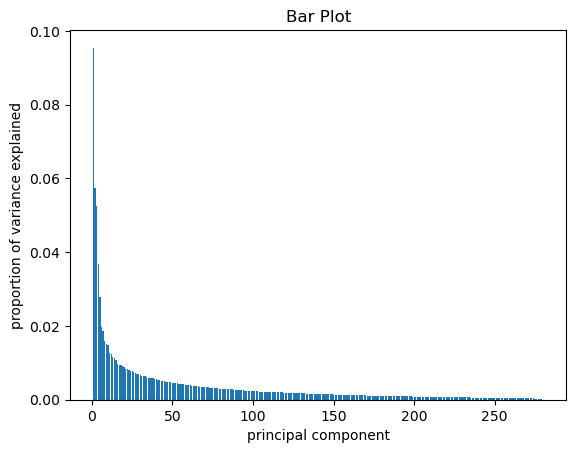

In [7]:
# Create bar plot
xcor = np.arange(1, len(pve) + 1)  # 1,2,..,n_components
plt.bar(xcor, pve)

# Add labels
plt.title('Bar Plot')
plt.xlabel("principal component")
plt.ylabel("proportion of variance explained")
plt.show();

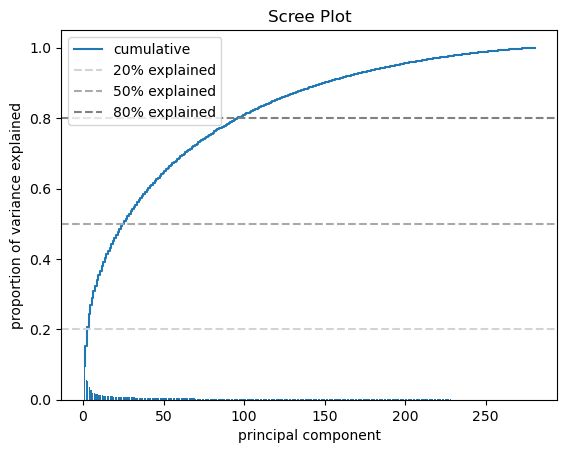

In [8]:
# Create bar plot
xcor = np.arange(1, len(pve) + 1)  # 1,2,..,n_components
plt.bar(xcor, pve)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor + 0.5,  # 1.5,2.5,..,n_components+0.5
    pve_cumsum,  # Cumulative sum
    label="cumulative")

#plot line
plt.axhline(y = 0.2, color ="lightgrey", linestyle ="--", label ='20% explained',)
plt.axhline(y = 0.5, color ="darkgrey", linestyle ="--", label ='50% explained',)
plt.axhline(y = 0.8, color ="grey", linestyle ="--", label ='80% explained',)


# Add labels
plt.title('Scree Plot')
plt.xlabel("principal component")
plt.ylabel("proportion of variance explained")
plt.legend()
plt.show();

In [9]:
# show cumulative sum and index
for index, val in np.ndenumerate(np.cumsum(pve)):
    print(index, val)

(0,) 0.09543072
(1,) 0.15278949
(2,) 0.20542039
(3,) 0.24213807
(4,) 0.26995197
(5,) 0.2897277
(6,) 0.30845833
(7,) 0.32443994
(8,) 0.33952436
(9,) 0.35428837
(10,) 0.36691326
(11,) 0.37938347
(12,) 0.39098015
(13,) 0.40217218
(14,) 0.4128666
(15,) 0.4226564
(16,) 0.43218398
(17,) 0.44158047
(18,) 0.4506699
(19,) 0.4595842
(20,) 0.46798977
(21,) 0.47628888
(22,) 0.48430705
(23,) 0.49220613
(24,) 0.49990082
(25,) 0.50751346
(26,) 0.51483154
(27,) 0.5218834
(28,) 0.5288265
(29,) 0.535429
(30,) 0.5418554
(31,) 0.54817116
(32,) 0.5544786
(33,) 0.56063336
(34,) 0.5666443
(35,) 0.572562
(36,) 0.5784186
(37,) 0.58418214
(38,) 0.58977574
(39,) 0.5953087
(40,) 0.6007679
(41,) 0.60604507
(42,) 0.61121684
(43,) 0.6162689
(44,) 0.62130713
(45,) 0.62624097
(46,) 0.6310197
(47,) 0.63577896
(48,) 0.6404645
(49,) 0.6451107
(50,) 0.6496605
(51,) 0.6541351
(52,) 0.65853447
(53,) 0.66286856
(54,) 0.66711116
(55,) 0.6713008
(56,) 0.675487
(57,) 0.6795624
(58,) 0.6835673
(59,) 0.68750674
(60,) 0.6914108
(6

In [10]:
# With no reduction of the dimensionality the values in the pve array sum to one.
pve.sum()

1.0

_Observation:_
* _The first PCA component explains 9,5% of the variance._
* _PC1 and PC2 explain 15%,_
* _PC1 to PC4 explain over 24%,_
* _PC1 to PC8 explain over 32%,_
* _PC1 to PC16 explain over 42%,_
* _PC1 to PC29 explain over 52%,_
* _PC1 to PC49 explain over 64%,_
* _PC1 to PC80 explain over 75%,_
* _PC1 to PC134 explain over 78% of the variance._
* _For 100% of the variance to be explained, all the PCA components are needed._

## Task 2: PC1 and PC2

After transforming the training dataset using the first two PCA components, visualize the transformed data on a 2D-plot and use 6 different colors to designate the 6 categories. What can you say about the results?

__Recap of PCA and scaling from the course:__

The idea behind PCA is to reduce the number of dimensions by projecting the data onto a set of n orthogonal axes, that capture as much of the variation in the data points as possible. By calling the _fitting estimator_, I compute the set of orthogonal axes. Once I have these, I can project any set of points from the original space onto them by calling the _transforming estimator_. To make sure, the algorithm favors variables with a large variance, I will standardize the variables with a ``StandartScaler``. This way, the data on which the PCA-transformation is calculated will be normalized. 

__Data leakage__

If a fitting estimator is used on the test dataset, there is data leakage from it. Test data should never be used to make choices about the model. The general rule is to never call ``fit`` or``fit_transform`` on the test data. Therefore, the StandartScaler should be build on the training data set and then applied to the test data set (by using ``transform``). Both train and test data subsets should receive the same preprocessing transformation, but there transformations are only learnt from the training data set. It is therefore recommend to use a Pipeline to chain together the feature selection and model estimators. The pipeline ensures that only the training data is used when performing ``fit``.

In [11]:
# Create a second PCA transformer
pca2 = PCA(n_components=2)

# Apply PCA on already rescaled data
pca2.fit(X_rescaled, y=None)

# Project data onto the first two components
X_2d = pca2.transform(X_rescaled)

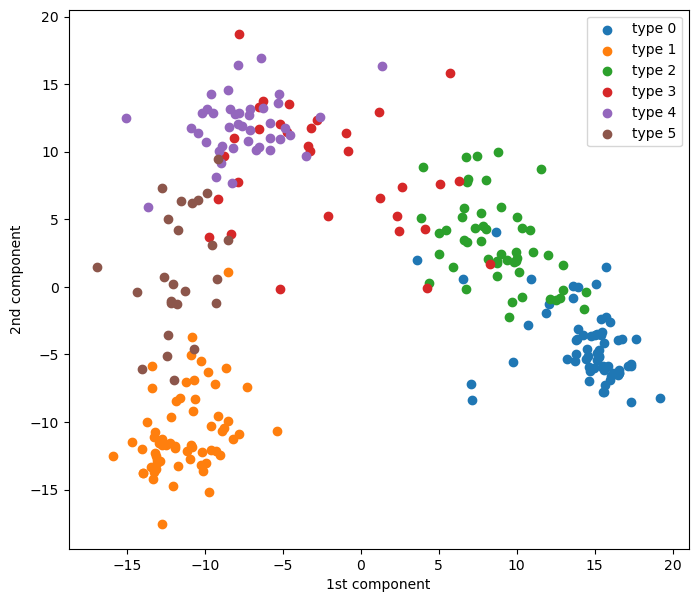

In [12]:
# Create figure
plt.figure(figsize=(8, 7))  

# Plot each class
for batch_labels in [0, 1, 2, 3, 4, 5]:
    # samples of this type
    idx = tr_batch_labels == batch_labels

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1], label="type {}".format(batch_labels))
    

# Labels and legend
plt.legend()
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

_Observation: For type 1, 3, 4 and 5 there is no clear cluster visible. Type 0 and 2 are more distinct._

## Task 3: K-means clustering

On the 2D transformed training data, apply k-means clustering with k equals 6. Plot the same 2D-plot as above but this time use the colors to distinguish between the six clusters obtained by k-means. Do the 6 clusters of k-means align with the 6 categories from above?

In [13]:
from sklearn.cluster import KMeans

# Create k-means object
kmeans = KMeans(n_clusters=6, random_state=0)  # Fix results, 6 classes

In [14]:
# Fit it to the data
kmeans.fit(X_2d, y=None)

KMeans(n_clusters=6, random_state=0)

In [15]:
# Get clusters
kmeans.labels_

array([1, 1, 1, 1, 5, 4, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 5, 1, 4, 1, 1, 1, 5, 1, 5, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5,
       5, 5, 4, 4, 5, 4, 4, 5, 4, 5, 5, 4, 5, 4, 4, 5, 5, 4, 4, 4, 5, 5,
       4, 4, 4, 5, 5, 4, 5, 5, 4, 4, 4, 5, 5, 5, 1, 4, 5, 5, 5, 5, 4, 4,
       4, 4, 5, 5, 4, 4, 2, 4, 2, 0, 2, 2, 2, 2, 0, 5, 4, 0, 2, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [16]:
# Get centroids
kmeans.cluster_centers_.shape

# array with one entry for each centroid and one column for each feature

(6, 2)

In [17]:
kmeans.cluster_centers_

array([[-10.997747 ,   2.2302175],
       [ 15.108845 ,  -5.2962627],
       [ -6.586468 ,  11.830469 ],
       [-11.413448 , -10.732846 ],
       [  6.1327195,   5.662591 ],
       [ 10.934738 ,   0.7156933]], dtype=float32)

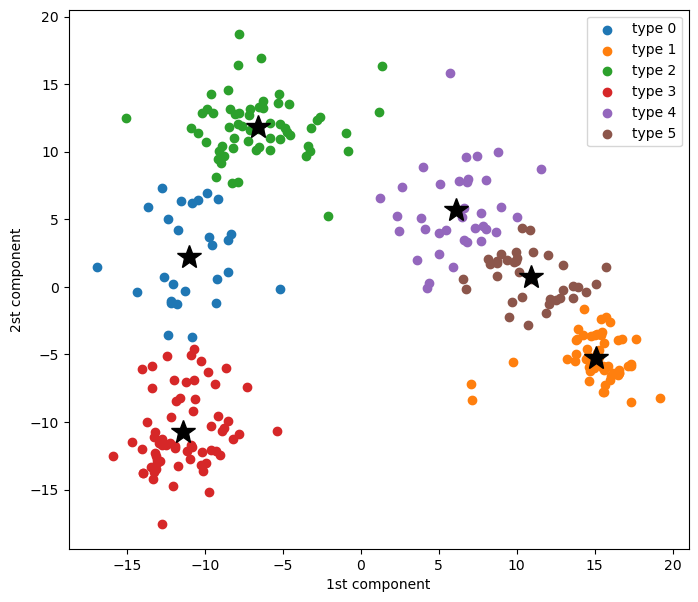

In [18]:
# Create figure
plt.figure(figsize=(8, 7))  

# Plot each class
for batch_labels in [0, 1, 2, 3, 4, 5]:
    # samples of this type
    idx = kmeans.labels_ == batch_labels

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1], label="type {}".format(batch_labels))


    # Plot centroid
for cluster in range(kmeans.n_clusters):
    centroid = kmeans.cluster_centers_[cluster]
    plt.plot(centroid[0], centroid[1], marker="*", color="black", markersize=18)
    

# Add legend and labels
plt.legend()
plt.xlabel("1st component")
plt.ylabel("2st component")
plt.show()

_Observation: The 6 clusters of k-means are different from the plot above. Here type 2 and 4 are distinctable, whereas there is no clear cluster for type 0, 1, 3, and 5._

## Task 4: Test dataset

Using the first two PCA components obtained form the training dataset, transform the test dataset. Visualize the transformed data on a 2D-plot and use 6 different colors to designate the 6 categories. Based on this visualization, how many sample in the test dataset you think might be hard to classify?

In [20]:
# scaling the test dataset with the training parameters 
Y_rescaled = scaler.transform(te_features)

# transform test dataset with PCA
test_2d = pca2.transform(Y_rescaled)

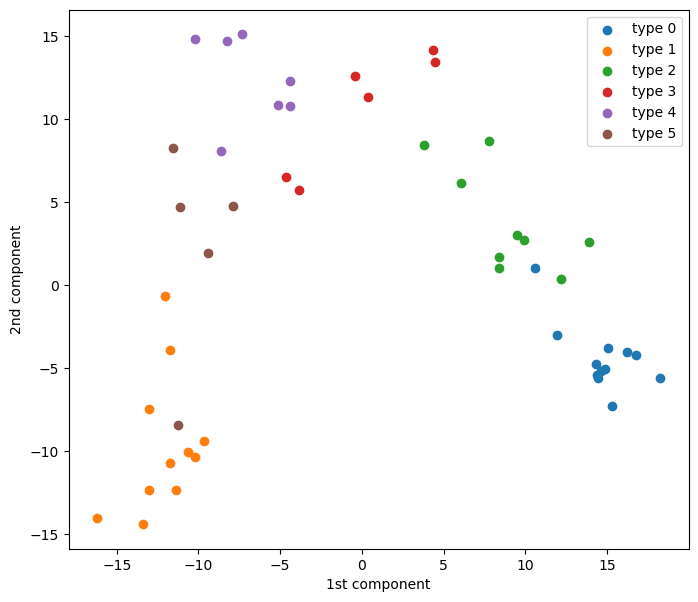

In [21]:
# Create figure
plt.figure(figsize=(8, 7))  

# Plot each class
for labels in [0, 1,2,3, 4,5]:
    # samples of this type
    idx = te_batch_labels == labels

    # Plot their components
    plt.scatter(test_2d[idx, 0], test_2d[idx, 1], label="type {}".format(labels))
    
# Labels and legend
plt.legend()
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

_Oberservation: There are a couple of samples in the test dataset which might be hard to classify. The hardest one is a type 5  point surrounded by type 1 points._